# How Football Managers can Better Approach Different Game States - a Statistical Analysis of Football Scorelines part 2

This project follows on from a previous report: The Most Dangerous Scoreline in Football - a Statistical Analysis of Football Scorelines . You can read it here: https://github.com/ConorSharpe/Football_Analytics/blob/master/The%20Most%20Dangerous%20Scoreline%20in%20Football%20-%20a%20Statistical%20Analysis%20of%20Football%20Scorelines%20.ipynb

If you have read the previous project please skip to the introduction as the code is identical.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
df1 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2007-to-2008-stats.csv")
df2 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2008-to-2009-stats.csv")
df3 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2009-to-2010-stats.csv")
df4 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2010-to-2011-stats.csv")
df5 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2011-to-2012-stats.csv")
df6 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2012-to-2013-stats.csv")
df7 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2013-to-2014-stats.csv")
df8 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2014-to-2015-stats.csv")
df9 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2015-to-2016-stats.csv")
df10 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2016-to-2017-stats.csv")
df11 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2017-to-2018-stats.csv")
df12 = pd.read_csv("/Users//ConorSharpe/Downloads/combine/england-premier-league-matches-2018-to-2019-stats.csv")


In [5]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]) #Combine dataframes
df = df.reset_index()

df = pd.DataFrame({'home_team_name' : df['home_team_name'],
                    'away_team_name' : df['away_team_name'],
                    'home_team_goal_count' : df['home_team_goal_count'],
                    'away_team_goal_count' : df['away_team_goal_count'],
                    'home_team_goal_timings' : df['home_team_goal_timings'],
                    'away_team_goal_timings' : df['away_team_goal_timings'], }) #Create dataframe with only relevant columns



In [6]:

HGT = df.home_team_goal_timings.str.split(",").apply(pd.Series)
HGT.columns = ['hg1', 'hg2', 'hg3', 'hg4', 'hg5', 'hg6', 'hg7', 'hg8', 'hg9'] #Split goal times into seperate columns



                     

In [7]:
HGT['hg1'] = HGT['hg1'].str[:2]
HGT['hg2'] = HGT['hg2'].str[:2]    
HGT['hg3'] = HGT['hg3'].str[:2]
HGT['hg4'] = HGT['hg4'].str[:2]
HGT['hg5'] = HGT['hg5'].str[:2]
HGT['hg6'] = HGT['hg6'].str[:2]
HGT['hg7'] = HGT['hg7'].str[:2]
HGT['hg8'] = HGT['hg8'].str[:2]
HGT['hg9'] = HGT['hg9'].str[:2] #Remove 'added time' from data

HGT = HGT.fillna(99) # Replace NaN with 99
HGT = HGT.astype(float) #Convert data to floats


In [8]:
AGT = df.away_team_goal_timings.str.split(",").apply(pd.Series)
AGT.columns = ['ag1', 'ag2', 'ag3', 'ag4', 'ag5', 'ag6', 'ag7',]

AGT['ag1'] = AGT['ag1'].str[:2]
AGT['ag2'] = AGT['ag2'].str[:2]
AGT['ag3'] = AGT['ag3'].str[:2]
AGT['ag4'] = AGT['ag4'].str[:2]
AGT['ag5'] = AGT['ag5'].str[:2]
AGT['ag6'] = AGT['ag6'].str[:2]
AGT['ag7'] = AGT['ag7'].str[:2]


AGT = AGT.fillna(99)
AGT = AGT.astype(float)


In [9]:
df['goal_difference'] = df['home_team_goal_count']-df['away_team_goal_count'] #Create goal difference column

df['result'] = np.select([df['goal_difference'] > 0, df['goal_difference'] == 0, df['goal_difference'] < 0],
                        ['HOME', 'DRAW', 'AWAY']) #Create results column 



In [10]:
df_model = pd.concat([HGT, AGT], axis=1)
df_model['result'] = df['result'] # Combine dataframes 

In [11]:
def home_goals (t):
            goals_list = []                #create empty list
            for i in range(0,4559):
                if (t >= df_model['hg9'][i]):
                    goals = 9
                elif (t >= df_model['hg8'][i]):
                    goals = 8
                elif (t >= df_model['hg7'][i]):
                    goals = 7
                elif (t >= df_model['hg6'][i]):
                    goals = 6    
                elif (t >= df_model['hg5'][i]):
                    goals = 5
                elif (t >= df_model['hg4'][i]):
                    goals = 4
                elif (t >= df_model['hg3'][i]):
                    goals = 3
                elif (t >= df_model['hg2'][i]):
                    goals = 2
                elif (t >= df_model['hg1'][i]):
                    goals = 1
                else: 
                    goals = 0          #find score at time t

                goals_list.append(goals)  #add score to list

            return(goals_list)          


In [12]:
def away_goals (t):
            goals_list = []                #create empty list
            for i in range(0,4559):
                if (t >= df_model['ag7'][i]):
                    goals = 7
                elif (t >= df_model['ag6'][i]):
                    goals = 6    
                elif (t >= df_model['ag5'][i]):
                    goals = 5
                elif (t >= df_model['ag4'][i]):
                    goals = 4
                elif (t >= df_model['ag3'][i]):
                    goals = 3
                elif (t >= df_model['ag2'][i]):
                    goals = 2
                elif (t >= df_model['ag1'][i]):
                    goals = 1
                else: 
                    goals = 0          #find score at time x

                goals_list.append(goals)  #add score to list

            return(goals_list)  

In [13]:
 def goal_diff (t):
        return (np.asarray(home_goals(t)) - np.asarray(away_goals(t)) )  #find difference between home and away goals in each match at time x


In [14]:
def model (t, gd):

    def win_prob (t): 
            home = df['result'][np.where(goal_diff(t) == gd)[0]].tolist().count('HOME') #number of times the goal differnce is s and home team wins
            away = df['result'][np.where(goal_diff(t) == -gd)[0]].tolist().count('AWAY')  #number of times the goal differnce is -s and away team wins
            total = len(np.where(goal_diff(t) == gd)[0].tolist()) + len(np.where(goal_diff(t) == -gd)[0].tolist()) #number of times the goal difference is s or -s

            prob = (home + away) / total

            return(prob)

    def draw_prob (t): 
            home = df['result'][np.where(goal_diff(t) == gd)[0]].tolist().count('DRAW') #number of times the goal differnce is s and the game is a draw
            away = df['result'][np.where(goal_diff(t) == -gd)[0]].tolist().count('DRAW')  #number of times the goal differnce is -s and the game is a draw
            total = len(np.where(goal_diff(t) == gd)[0].tolist()) + len(np.where(goal_diff(t) == -gd)[0].tolist()) #number of times the goal difference is s or -s

            prob = (home + away) / total

            return(prob)

    def lose_prob (t): 
            home = df['result'][np.where(goal_diff(t) == gd)[0]].tolist().count('AWAY') #number of times the goal differnce is s and away team wins
            away = df['result'][np.where(goal_diff(t) == -gd)[0]].tolist().count('HOME')  #number of times the goal differnce is -s and home team wins
            total = len(np.where(goal_diff(t) == gd)[0].tolist()) + len(np.where(goal_diff(t) == -gd)[0].tolist()) #number of times the goal difference is s or -s

            prob = (home + away) / total

            return(prob)
    return([win_prob(t), draw_prob(t), lose_prob(t)])
   

In [16]:
x = np.linspace(10, 90 , 81)
def plot_model(gd):
    plot_list = []
    for t in x:
        plot = model(t, gd)[0]
        
        plot_list.append(plot)
       
    return(plot_list)

In [17]:
def xPTS (t, gd):
    return(3*model(t, gd)[0] + model(t, gd)[1])

In [18]:
x = np.linspace(10, 90 , 81)
def plot_xPTS(gd):
    plot_list = []
    for t in x:
        plot = xPTS(t, gd)
        
        plot_list.append(plot)
       
    return(plot_list)

In [19]:
z_0 = plot_xPTS(0)

In [20]:
z_1 = plot_xPTS(1)

In [21]:
z_2 = plot_xPTS(2)


In [22]:
z_neg1 = plot_xPTS(-1)

In [23]:
z_neg2 = plot_xPTS(-2)

# Introduction

The previous report demonstrated a model used to calculate the likelihood of each potential outcome of a game of football (win, draw, loss). The ‘value’ of scoring a goal was found and the model showed that not all goals scored have the same ‘value’. Both the current scoreline and minutes played at the time the goal is scored have an impact on how many more points a team can expect to receive by scoring a goal. In this article these findings will be used to explore a number of game states and discuss possible actions that could be made by managers and coaches in order to increase the number of points they can expect to receive. As the same model is being used, the same scope of inference and limitations from the previous report apply.

Below is the plot showing the number of points a team can expect to receive based on the current scoreline and minutes played in the game. This is identical to the plot from the previous article and will be used to analyse the different game states. The game states that will be analysed are: level game, winning by one goal and losing by one goal (represented by the orange, red and purple lines). These were chosen as they are the most common scorelines and therefore most likely game states for a team to find themselves in.

Text(0, 0.5, 'Minutes Played')

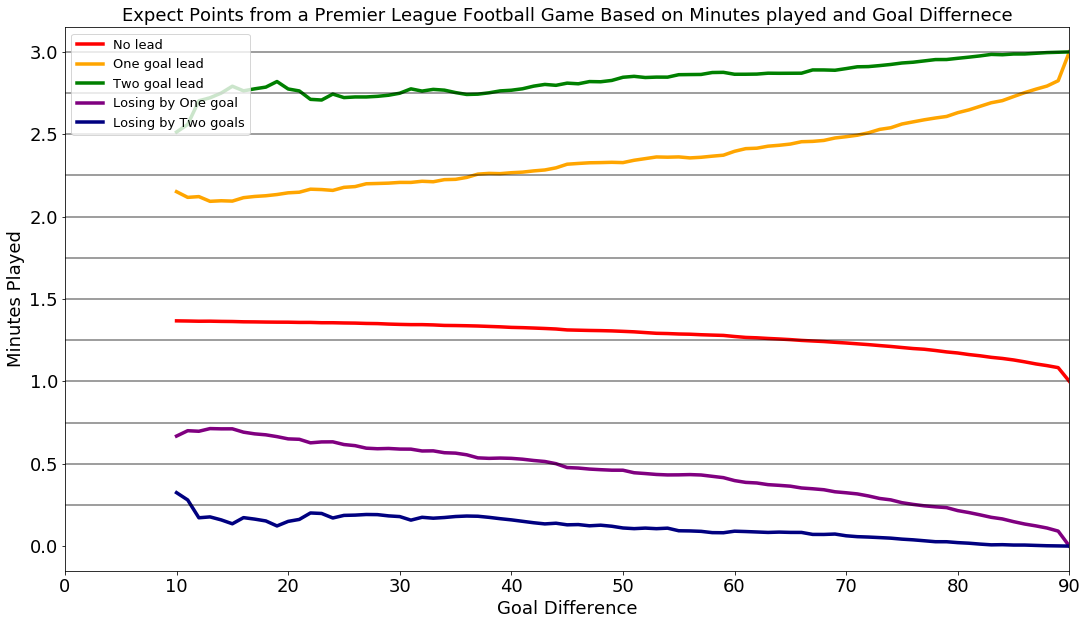

In [44]:
plt.figure(figsize=(18,10))

plt.plot(x, z_0, color = 'red', linewidth = 3.5, label = 'No lead ')
plt.plot(x, z_1, color = 'orange', linewidth = 3.5, label = 'One goal lead')
plt.plot(x, z_2, color = 'green', linewidth = 3.5, label = 'Two goal lead')
plt.plot(x, z_neg1, color = 'purple', linewidth = 3.5, label = 'Losing by One goal')
plt.plot(x, z_neg2, color = 'navy', linewidth = 3.5, label = 'Losing by Two goals')
plt.legend(loc='upper left' , prop={'size': 13})

plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.75, 1.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [2, 2], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.25, 2.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.5, 2.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.75, 2.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [3, 3], color = 'black', alpha=0.5)



plt.xlim(0,90)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('Expect Points from a Premier League Football Game Based on Minutes played and Goal Differnece', fontsize=18)
plt.xlabel('Goal Difference' , fontsize=18)
plt.ylabel('Minutes Played', fontsize=18)




## Methodology

In order for managers and coaches to decide on the tactics to implement at any given scoreline and any given time, it is important to know the effects that scoring or conceding a goal would have. In order to do this the expected points difference will be investigated, this is the increase or decrease in the points a team can expect to receive if they score or concede a goal. To calculate this, the expected points of the current scoreline are deducted from the expected points of the new scoreline. A positive value indicates a team can expect to receive more points by going from the current scoreline to the new scoreline and a negative value indicates a team can expect to receive less points. 

For example, to find expected points difference between a one goal and two goal lead in the 53rd minute, we subtract the expected points of a one goal lead in the 53rd minute from the expected points of a two goal lead in the 53rd minute.

In [41]:
xPTS(53, 2) - xPTS(53, 1)

0.4847216001508685

The expected points difference between a one goal and two goal lead in the 53rd minute is 0.48.

# Level Game
As seen on the expected points graph above, a team that is drawing a game can expect approximately 1.3 - 1.4 points in the 10th minute and this drops gradually to 1 point in the 90th minute. This means, the longer a game remains level, the fewer the points a team can expect to receive. 

The expected points difference for a team that is currently drawing a game is plotted below. The plot on the right shows the absolute expected points difference (the negative line reflected in the x-axis) for ease of comparison.

In [32]:
x_pts_diff_0_1 = np.array(z_1) - np.array(z_0)
x_pts_diff_0_1 = x_pts_diff_0_1.tolist()

In [33]:
x_pts_diff_0_neg1 = np.array(z_0) - np.array(z_neg1)
x_pts_diff_0_neg1 = x_pts_diff_0_neg1.tolist()

Text(0.5, 0, 'Minutes Played')

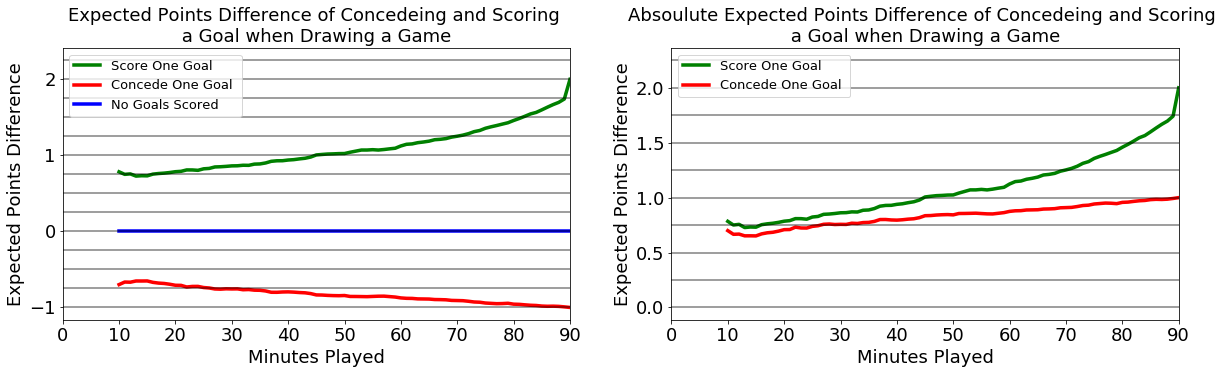

In [34]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2 ,1 )
plt.plot(x, x_pts_diff_0_1, color = 'green', linewidth = 3.5, label = 'Score One Goal ')
plt.plot(x, (-np.array(x_pts_diff_0_neg1)).tolist(), color = 'red', linewidth = 3.5, label = 'Concede One Goal ')
plt.plot([10, 90], [0, 0], color = 'blue', linewidth = 3.5, label = 'No Goals Scored')
plt.legend(loc='upper left' , prop={'size': 13})

plt.plot([0, 90], [-1, -1], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.75, -0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.5, -0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.25, -0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0, 0], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.75, 1.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [2, 2], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.25, 2.25], color = 'black', alpha=0.5)



plt.xlim(0,90)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('Expected Points Difference of Concedeing and Scoring \n a Goal when Drawing a Game ', fontsize=18)
plt.ylabel('Expected Points Difference' , fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)

plt.subplot(1, 2, 2)
plt.plot(x, x_pts_diff_0_1, color = 'green', linewidth = 3.5, label = 'Score One Goal ')
plt.plot(x, x_pts_diff_0_neg1, color = 'red', linewidth = 3.5, label = 'Concede One Goal ')
plt.legend(loc='upper left' , prop={'size': 13})


plt.plot([0, 90], [0, 0], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.75, 1.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [2, 2], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.25, 2.25], color = 'black', alpha=0.5)



plt.xlim(0,90)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('Absoulute Expected Points Difference of Concedeing and Scoring \n a Goal when Drawing a Game ', fontsize=18)
plt.ylabel('Expected Points Difference' , fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)

The plot shows that the expected points difference of scoring one goal and therefore holding a one goal lead is approximately 0.7-0.8 in the 10th minute gradually rising to 1 in the 45th minute and then 2 in the 90th minute. As stated in the previous article, the most ‘valuable’ goal to score in a game of football is the goal which puts your team in the lead. This is supported by the findings that the expected points difference of going from drawing to winning by one goal is larger than the expected points difference of any other scorelines.
 
Looking at the line representing the expected points difference, by conceding a goal a team's expected points are reduced approximately 0.7 in the 10th minute, 0.8 in the 45th minute and 1 in the 90th minute. This is a significant difference in expected points and is the second largest of all scorelines. This could explain why managers and coaches often don’t go ‘all out’ in an attempt to score a goal when drawing a game because there are very significant consequences if the opposition scores a goal.
 
However looking at the right hand plot, the green line representing scoring a goal is above the red line representing conceding a goal. Therefore, regardless of minutes played the positive impact of scoring a goal is greater than the negative impact of conceding a goal. In a hypothetical situation in which a team using a more proactive attacking tactic would result in them scoring 50% of the time and the other team scoring 50% of the time, it would always be sensible to adopt this tactic. However, as we know there are a number of factors that will affect how likely a team is to score the next goal. It could be hypothesised that a team of higher 'quality' would be more capable of scoring the next goal so should be more attacking tactic whereas a team of lower ‘quality’ is more likely to concede the next goal so should be using a more defensive tactic.
 
As time increases both the benefit of scoring and downside of conceding increase, however not at the same rate. The gap between these increases as minutes played increase. So it could be argued that waiting until the later stages of the game when the risk reward ratio is lower, may be the more sensible time to adopt an attacking tactic .


# One Goal Lead

Looking at the expected points plot, a team winning by one goal can expect to receive approximately 2.2 - 2.3 in the 10th minute rising to 3 in the 90th minute. So the longer a team is winning by one goal, the more points they can expect to receive. Like in the scenario above, the effects of scoring a goal and the effects of conceding a goal will be investigated. 

Below are the expected points difference plots for a one goal lead, with the right hand plot showing the absolute expected points difference.


In [35]:
x_pts_diff_1_2 = np.array(z_2) - np.array(z_1)
x_pts_diff_1_2 = x_pts_diff_1_2.tolist()

(0, 90)

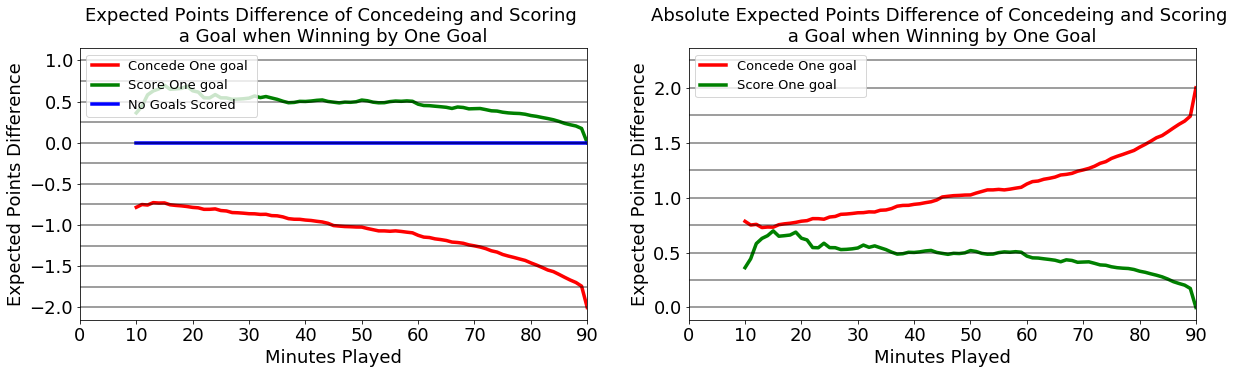

In [40]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2 ,1 )

plt.plot(x, (-np.array(x_pts_diff_0_1)).tolist(), color = 'red', linewidth = 3.5, label = 'Concede One goal ')
plt.plot(x, x_pts_diff_1_2, color = 'green', linewidth = 3.5, label = 'Score One goal ')
plt.plot([10, 90], [0, 0], color = 'blue', linewidth = 3.5, label = 'No Goals Scored')
plt.legend(loc='upper left' , prop={'size': 13})


plt.plot([0, 90], [-2, -2], color = 'black', alpha=0.5)
plt.plot([0, 90], [-1.75, -1.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [-1.5, -1.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [-1.25, -1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [-1, -1], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.75, -0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.5, -0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.25, -0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0, -0], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)


plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('Expected Points Difference of Concedeing and Scoring \n a Goal when Winning by One Goal ', fontsize=18)
plt.ylabel('Expected Points Difference' , fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)



plt.xlim(0,90)

plt.tick_params(axis='both', which='major', labelsize=18)



plt.subplot(1, 2 ,2 )
plt.plot(x, x_pts_diff_0_1, color = 'red', linewidth = 3.5, label = 'Concede One goal ')
plt.plot(x, x_pts_diff_1_2, color = 'green', linewidth = 3.5, label = 'Score One goal ')
plt.legend(loc='upper left' , prop={'size': 13})

plt.plot([0, 90], [0, 0], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.75, 1.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [2, 2], color = 'black', alpha=0.5)
plt.plot([0, 90], [2.25, 2.25], color = 'black', alpha=0.5)


plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('Absolute Expected Points Difference of Concedeing and Scoring \n a Goal when Winning by One Goal ', fontsize=18)
plt.ylabel('Expected Points Difference' , fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)

plt.xlim(0,90)

The plot shows us that the expected points difference of scoring one goal and therefore holding a two goal lead, peaks at around 0.7 in the 15th minute, holds relatively constant at approximately 0.5 until the 60th minute before dropping to 0 in the 90th minute. Although these values may appear small they are actually very significant across a 38 game Premier League season. For some teams a single point can be the difference between becoming champions or runners up and for others it can mean surviving relegation. It is commonplace in Premier League football to see a team go one goal ahead and then 'shut up shop' in an attempt to hold onto their lead, this data suggests that it could potentially be beneficial for a team to employ a more attacking tactic.

However, looking at the line representing the expected points difference of conceding a goal, it can be seen why so many teams and managers adopt this tactic. A team is expected to lose approximately 0.75 points if they concede a goal in the 10th minute rising up to approximately 1.25 in the 70th and 2 in the 90th minute. The plot on the right shows that if a team is winning by one goal, then regardless of how many minutes have been played, conceding a goal will have a greater negative impact on the team than scoring would have a positive impact. In the hypothetical situation in which a team pusing a more proactive attacking tactic will result in them scoring 50% of the time and the other team scoring 50% of the time, then it would never be sensible for a team that is leading by one goal to use this tactic. However, the same factors discussed in the level game analysis above should be considered.

Another takeaway of the plots above is that the difference between the positive impact of scoring a goal and the negative impact of conceding are relatively similar for lower minutes played, they then diverge as the minutes played increase. It could be suggested that if a team feels a more attacking tactic may be the correct strategy to use, then the best time to use this is earlier in the game when scoring another goal has a higher benefit and conceding a goal has lower implications. As the team approaches the later portion of the game, it may be sensible to adopt a more passive approach because scoring a goal will only have a small increase in expected points but conceding a goal will cause a large decrease in the expected points received.


# Losing by One Goal

Looking at the original plot, the expected points of a team losing by one goal is approximately 0.7 in the 10th minute, dropping to 0.5 in the 45th minute and then 0 in the 90th minute. So the longer a team is losing by one goal, the lower points they can expect to receive. Like above, the effects of scoring and the effects of conceding a goal will be discussed. 

Below are the expected points difference plots for a team losing by one goal, with the right hand plot showing the absolute expected points difference.

In [37]:
x_pts_diff_neg1_neg2 = np.array(z_neg2) - np.array(z_neg1)
x_pts_diff_neg1_neg2 = x_pts_diff_neg1_neg2.tolist()

(0, 90)

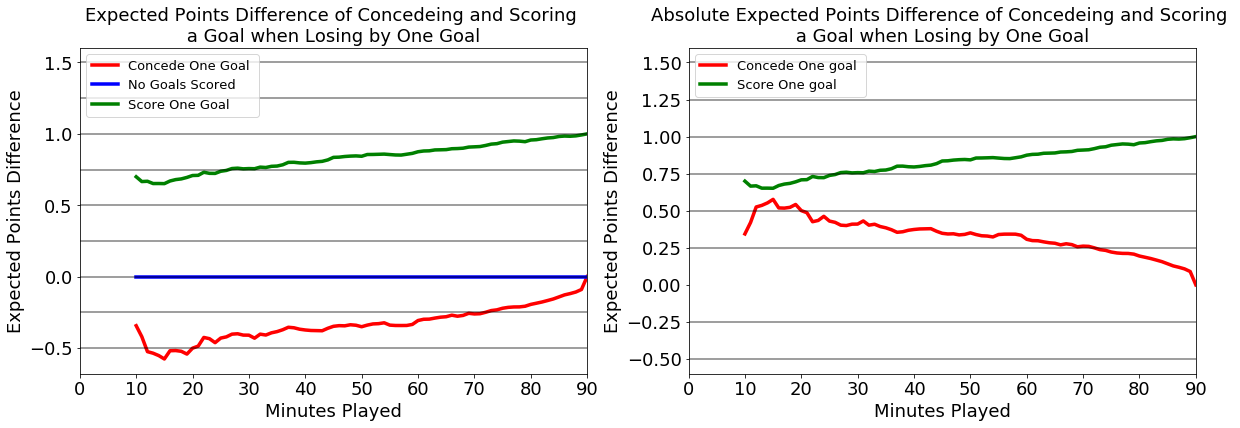

In [45]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2 ,1 )


plt.plot(x, x_pts_diff_neg1_neg2, color = 'red', linewidth = 3.5, label = 'Concede One Goal ')
plt.plot([10, 90], [0, 0], color = 'blue', linewidth = 3.5, label = 'No Goals Scored')
plt.plot(x, x_pts_diff_0_neg1, color = 'green', linewidth = 3.5, label = 'Score One Goal ')
plt.legend(loc='upper left' , prop={'size': 13})



plt.plot([0, 90], [-0.5, -0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.25, -0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0, -0], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)

plt.title('Expected Points Difference of Concedeing and Scoring \n a Goal when Losing by One Goal ', fontsize=18)
plt.ylabel('Expected Points Difference' , fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=18)


plt.xlim(0,90)



plt.subplot(1, 2 ,2 )
plt.plot(x, (-np.array(x_pts_diff_neg1_neg2)).tolist(), color = 'red', linewidth = 3.5, label = 'Concede One goal ')
plt.plot(x, x_pts_diff_0_neg1, color = 'green', linewidth = 3.5, label = 'Score One goal ')
plt.legend(loc='upper left' , prop={'size': 13})


plt.plot([0, 90], [-0.5, -0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [-0.25, -0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.25, 0.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.5, 0.5], color = 'black', alpha=0.5)
plt.plot([0, 90], [0.75, 0.75], color = 'black', alpha=0.5)
plt.plot([0, 90], [1, 1], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.25, 1.25], color = 'black', alpha=0.5)
plt.plot([0, 90], [1.5, 1.5], color = 'black', alpha=0.5)


plt.tick_params(axis='both', which='major', labelsize=18)

plt.title('Absolute Expected Points Difference of Concedeing and Scoring \n a Goal when Losing by One Goal ', fontsize=18)
plt.ylabel('Expected Points Difference' , fontsize=18)
plt.xlabel('Minutes Played', fontsize=18)

plt.xlim(0,90)



Looking at the line representing scoring one goal, we see that if a team losing by one goal scores the points they can expect to receive increases by approximately 0.7 in the 10th minte, 0.8 in the 45th minute and rises to 1 in the 90th minute. This means a goal scored in the later stages of a game has a higher impact on the expected points than a goal scored in the earlier stages of a game. 

Looking at the line representing conceding one goal, if a team losing by one goal concedes a goal then this reduces their expected points by approximately 0.6 in the 10th minute, 0.3 in the 45th minute and 0 in the 90th minute. This means the negative impact conceding a goal has on a team's expected points reduces as minutes played increase. This explains the phenomenon of goalkeepers being sent forward to attack a corner when their team is losing in the closing moments of a game. In these situations teams have almost nothing to lose in terms of points, so are willing to take a large risk in attempting to score a goal and receive a point.

Looking at the right hand plot, the green line representing scoring a goal is above the red line representing conceding a goal for all minutes played. This means regardless of the number of minutes played, the positive impact of scoring a goal outways the negative impact of conceding a goal. So in the 50/50 scenario posed above, it would always be beneficial to adopt a more attacking strategy. This attacking strategy becomes more beneficial later in the game; the plot shows the lines diverge as minutes played increases. This means the benefits are increased and the downsides are decreased. Because of this, it could be suggested that adopting a more attacking tactic as minutes played increases is sensible. However, it is important to make sure not to wait too long to implement this tactic because, as stated above, the longer a team is losing by one goal, the lower the points they can expect to receive.


# Discussion

In general this report recommends a more proactive attacking approach, the extent and timing of this is dependent on the scoreline. This can be explained by the points system used by the Premier league: 0 points for losing, 1 point for drawing and 3 points for winning.This means a win is worth 2 points more than a draw but a loss is worth 1 point less than a draw. However, the model predicts if a team is drawing they have an equal probability of winning or losing. It is this discrepancy that means a more attacking tactic is beneficial, this is exactly why the number of points for a win was changed from 2 to 3 in the English Football league in 1981: to encourage attacking football. 
 
However it is possible the analysis slightly inflates the benefits of a more proactive attacking tactic by failing to consider the points won by the opposition team. For example, playing more attacking may mean a team can expect to receive more points but it may also mean the opposition can expect to receive more points. This is not a problem if the two teams playing against each other are not close rivals in the league. However, if the two teams are close on points, then it becomes very important to consider potential points won by the opposition. Analyses of this would have to take into account absolute points won (i.e. one team's points minus the opposition teams points). This means that although the findings of this report recommend generally using a more attacking approach, it may be most optimal for teams to change their approach based on the proximity of the opposition teams league position. This would mean adopting a more passive approach in these games.
 
# Conclusion

This report has considered a number of scorelines and discussed the best way for managers and coaches to approach them in order to maximise points won. In general a more proactive attacking approach was recommended but there are a number of factors that affect the extent to which this tactic should be used. Both current scoreline and the minutes played dictate the best approach. The report also briefly touched upon the consideration of proximity of the opposition in the league table. It was recommended that if a team is a close rival in league position, adopting a proactive attacking approach is less beneficial and a more passive approach may be optimal.
